In [28]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

c:\Users\manse\OneDrive\Desktop\dynamic-clustering\notebooks
c:\Users\manse\OneDrive\Desktop\dynamic-clustering


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, chi2
from scripts.gaussian.utils_dc import (
    bhattacharyya_distance,
    hellinger_distance,
    mmd,
    wasserstein_distance,
    custom_distance,
)

# Experiment


In [30]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution

# Target distances (for demonstration)
target_distances = np.arange(0, 11, 1).tolist()  # Example: <0.5, ~0.5, >0.5


def experiment(
    distance_function,
    mean1=mean1,
    cov1=cov1,
    target_distances=target_distances,
    title="",
):
    for target_distance in target_distances:
        best_mean2 = None
        best_cov2 = None
        min_diff = float("inf")

        for _ in range(100):  # Try different configurations (adjust range as needed)
            # Vary mean2 and cov2 randomly (you'll need to adjust the ranges)
            mean2 = np.array(
                [np.random.uniform(-3, 3), np.random.uniform(-3, 3)]
            )  # Adjust range
            cov2 = np.array(
                [
                    [np.random.uniform(0.5, 3), np.random.uniform(-0.5, 0.5)],
                    [np.random.uniform(-0.5, 0.5), np.random.uniform(0.5, 3)],
                ]
            )  # Adjust range and ensure positive definite

            # Ensure positive definite covariance matrix (important!)
            cov2 = (cov2 + cov2.T) / 2  # Make symmetric
            eigenvalues, eigenvectors = np.linalg.eig(cov2)
            eigenvalues = np.maximum(
                eigenvalues, 0.1
            )  # Ensure eigenvalues are positive
            cov2 = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T

            distance = distance_function(mean1, cov1, mean2, cov2)

            diff = abs(distance - target_distance)
            if diff < min_diff:
                min_diff = diff
                best_mean2 = mean2
                best_cov2 = cov2
                best_distance = distance  # Update best distance

        print(
            f"Closest distance to {target_distance}: {min_diff:.4f} (achieved distance: {best_distance:.4f})"
        )

        # Plot the best configuration found
        x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
        pos = np.dstack((x, y))
        rv1 = multivariate_normal(mean1, cov1)
        rv2 = multivariate_normal(best_mean2, best_cov2)  # Use the best mean2 and cov2

        plt.figure(figsize=(8, 6))
        plt.contourf(
            x,
            y,
            rv1.pdf(pos),
            levels=20,
            cmap="Blues",
            alpha=0.7,
            label="Distribution 1",
        )
        plt.contourf(
            x,
            y,
            rv2.pdf(pos),
            levels=20,
            cmap="Reds",
            alpha=0.7,
            label="Distribution 2",
        )
        plt.title(f"{title}: {best_distance:.4f}")  # Use best_distance in title
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.show()

# Bhattacharyya distance


Closest distance to 0.0: 0.0429 (achieved distance: 0.0429)


C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:70: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


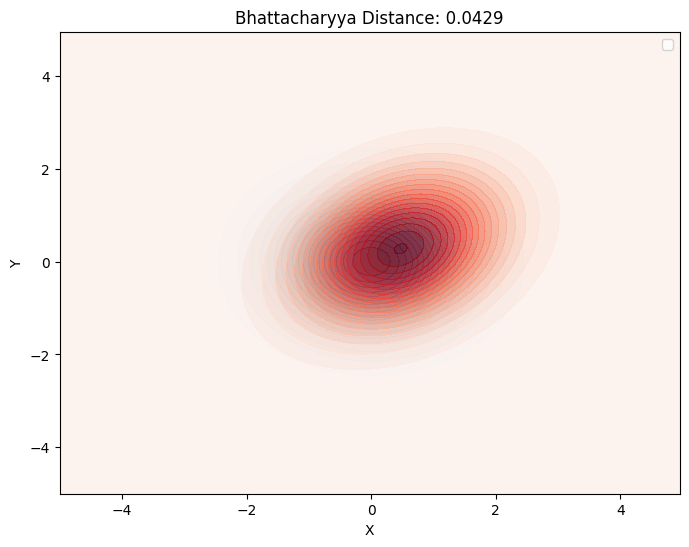

Closest distance to 0.1: 0.0123 (achieved distance: 0.0877)


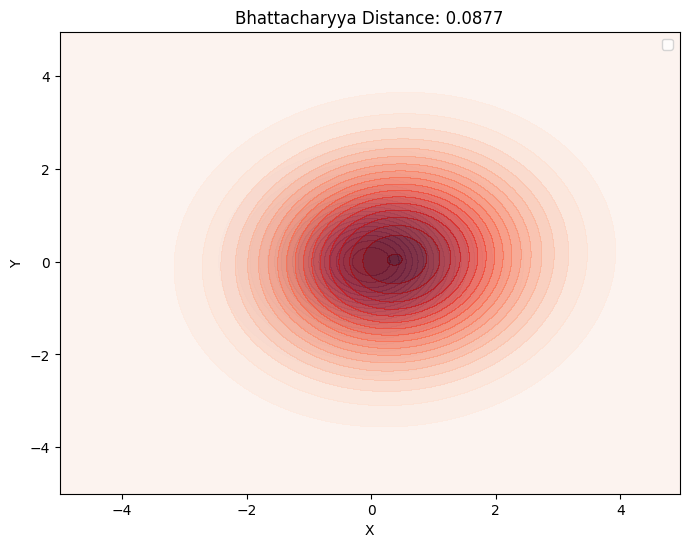

Closest distance to 0.2: 0.0023 (achieved distance: 0.2023)


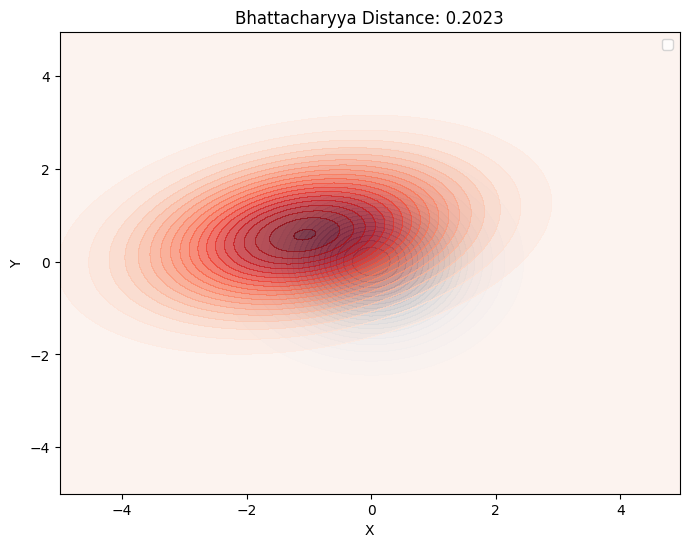

Closest distance to 0.30000000000000004: 0.0070 (achieved distance: 0.3070)


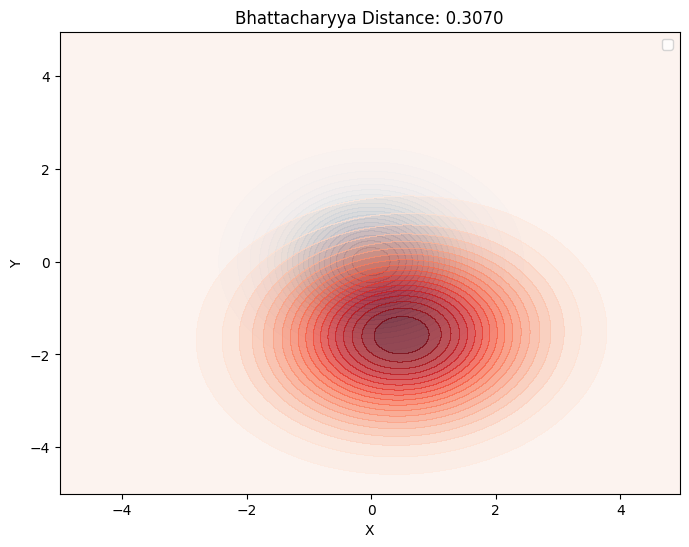

Closest distance to 0.4: 0.0050 (achieved distance: 0.4050)


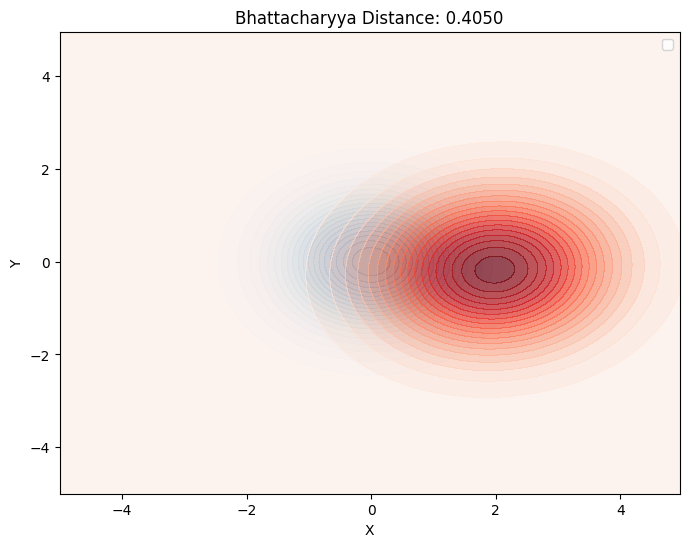

Closest distance to 0.5: 0.0026 (achieved distance: 0.4974)


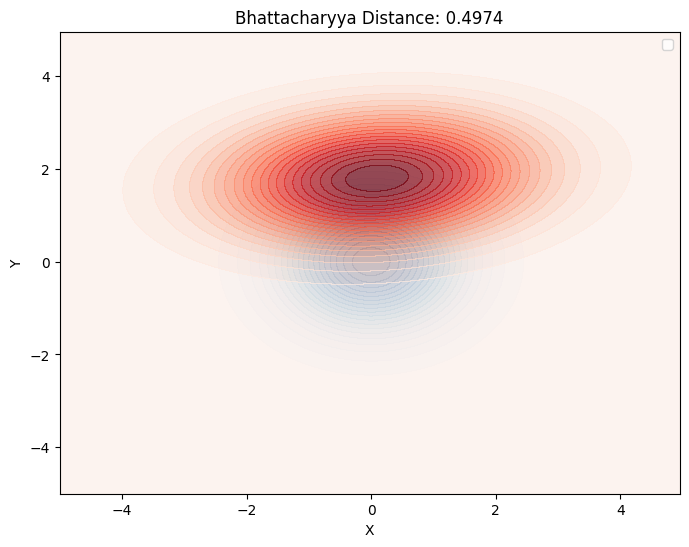

Closest distance to 0.6000000000000001: 0.0048 (achieved distance: 0.6048)


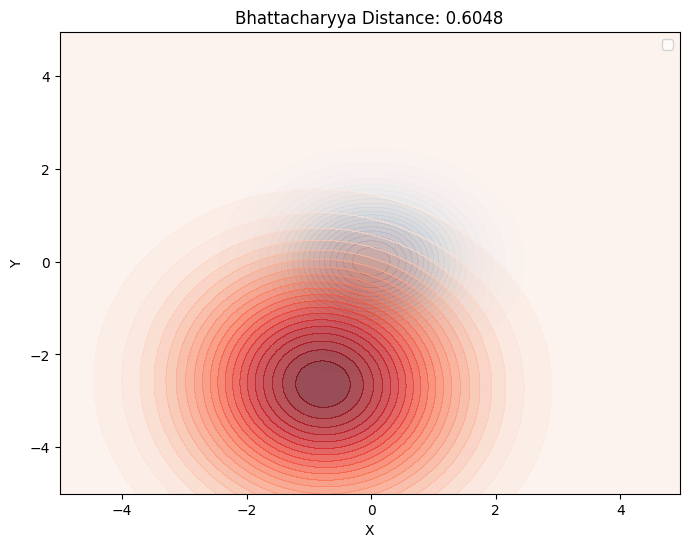

Closest distance to 0.7000000000000001: 0.0013 (achieved distance: 0.7013)


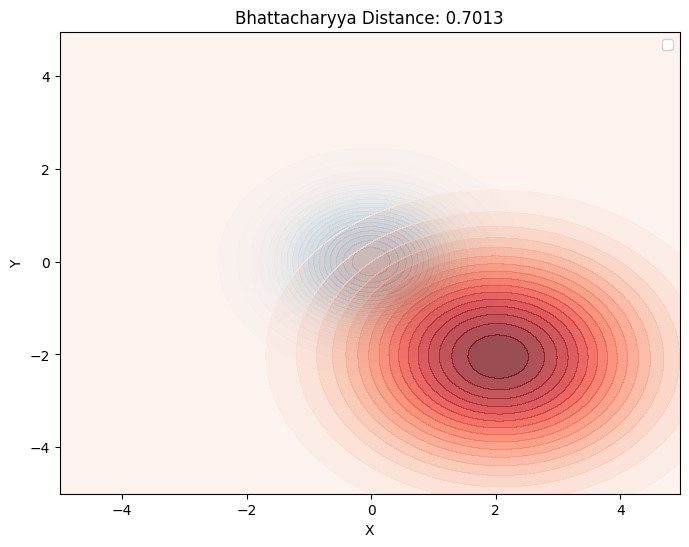

Closest distance to 0.8: 0.0002 (achieved distance: 0.7998)


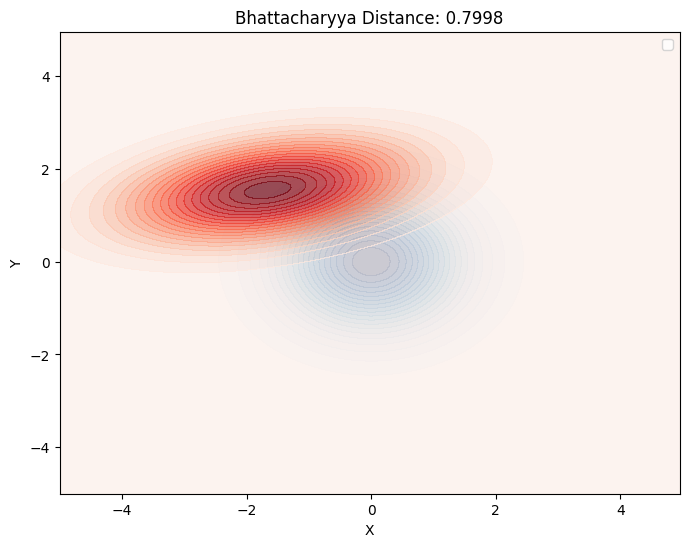

Closest distance to 0.9: 0.0038 (achieved distance: 0.8962)


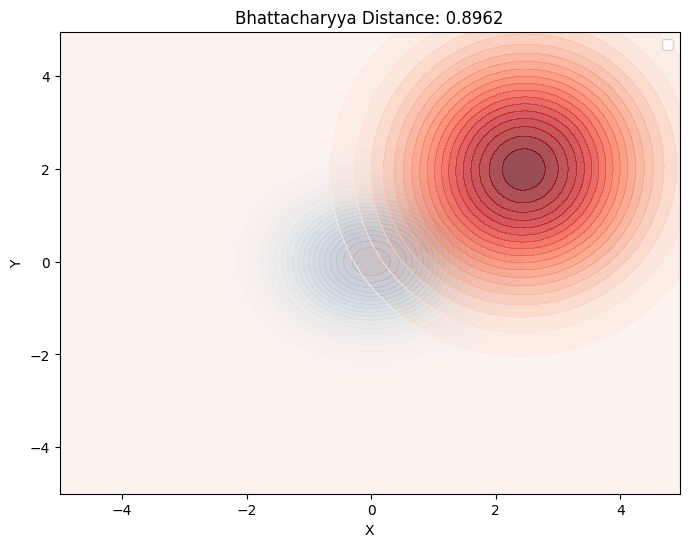

Closest distance to 1.0: 0.0017 (achieved distance: 1.0017)


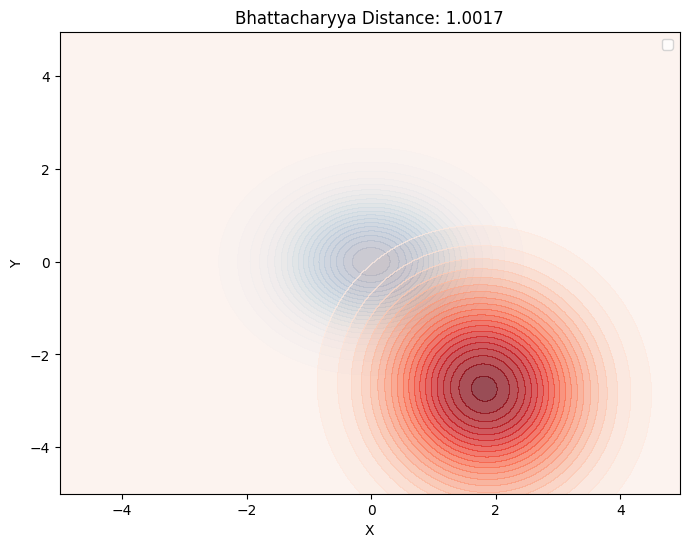

In [31]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution

# Target distances (for demonstration)
target_distances = np.arange(0, 1.1, 0.1).tolist()  # Example: <0.5, ~0.5, >0.5

experiment(
    bhattacharyya_distance,
    mean1=mean1,
    cov1=cov1,
    target_distances=target_distances,
    title="Bhattacharyya Distance",
)


# Hellinger distance


Closest distance to 0.0: 0.0000 (achieved distance: 0.0000)


C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:70: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


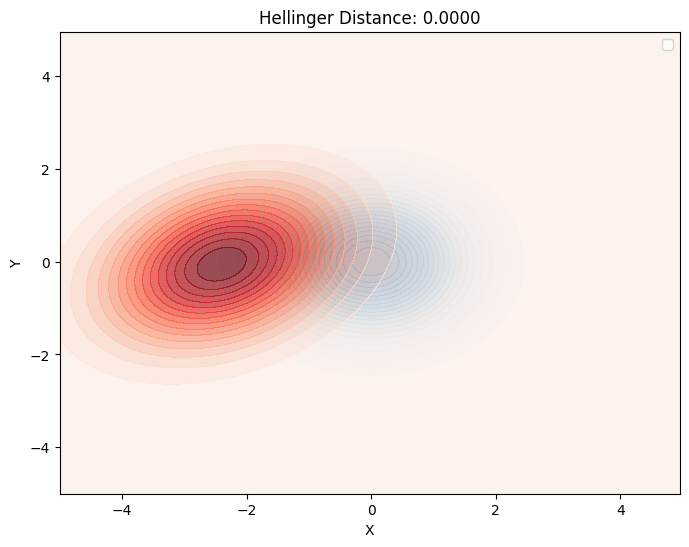

Closest distance to 0.1: 0.0123 (achieved distance: 0.0877)


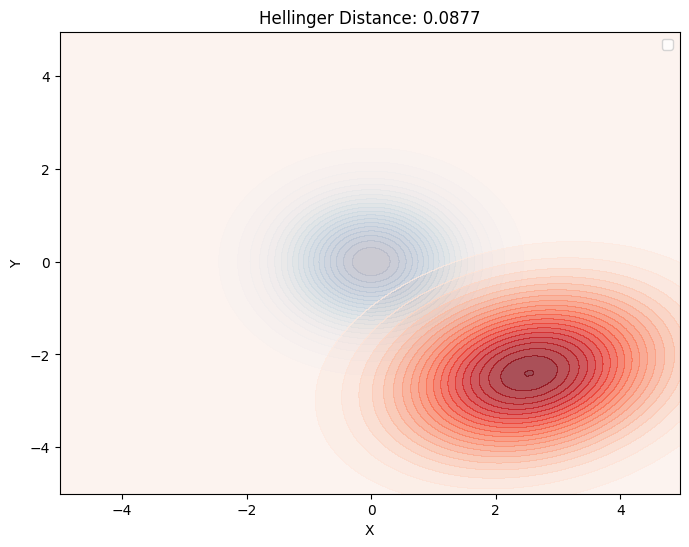

Closest distance to 0.2: 0.0253 (achieved distance: 0.1747)


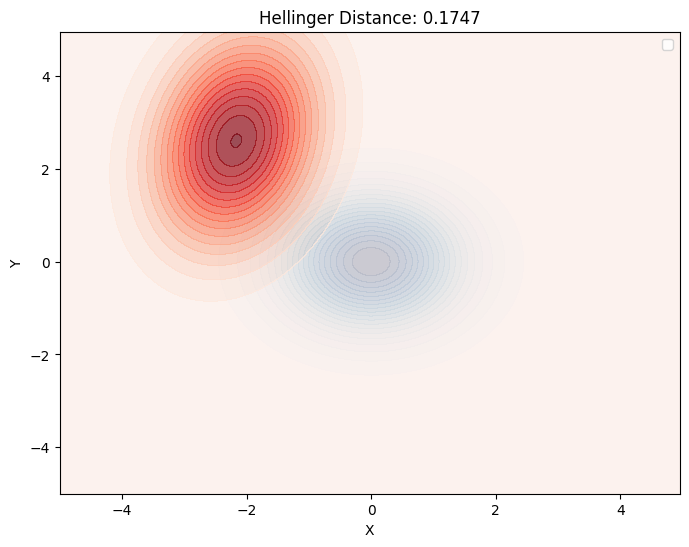

Closest distance to 0.30000000000000004: 0.0119 (achieved distance: 0.3119)


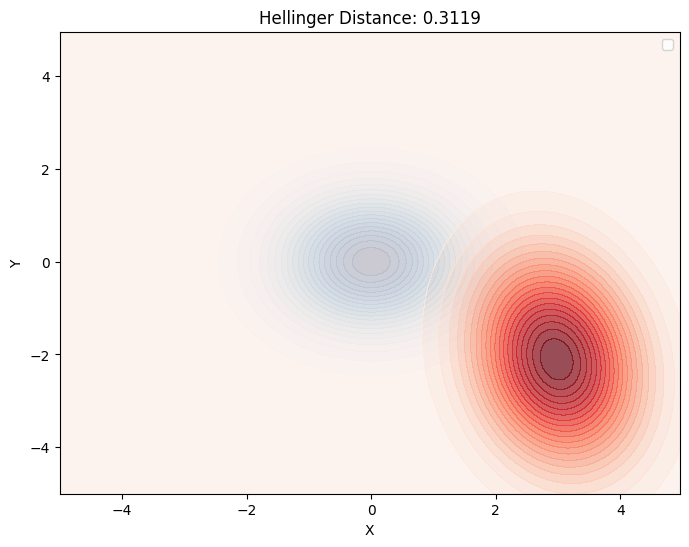

Closest distance to 0.4: 0.0203 (achieved distance: 0.4203)


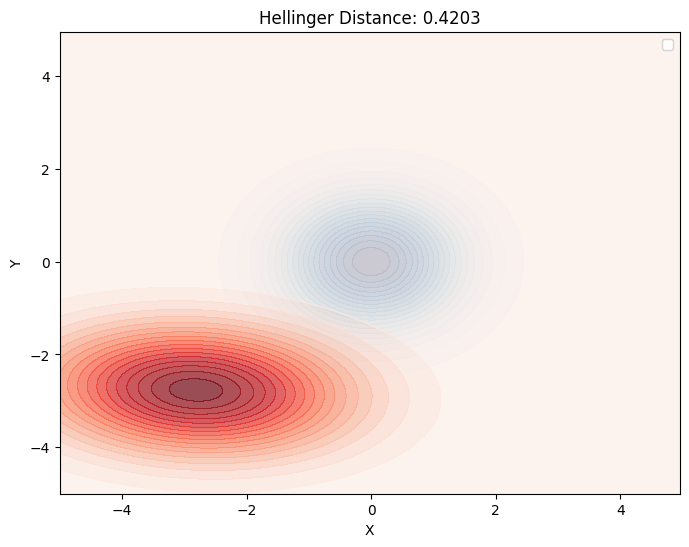

Closest distance to 0.5: 0.0654 (achieved distance: 0.5654)


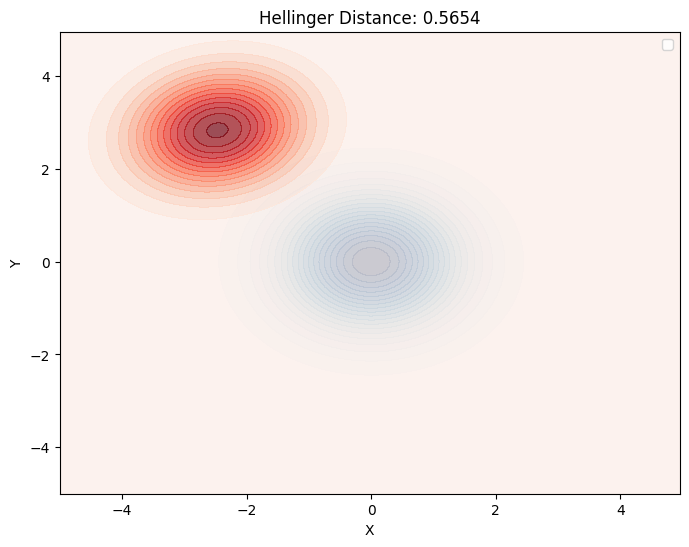

Closest distance to 0.6000000000000001: 0.0312 (achieved distance: 0.6312)


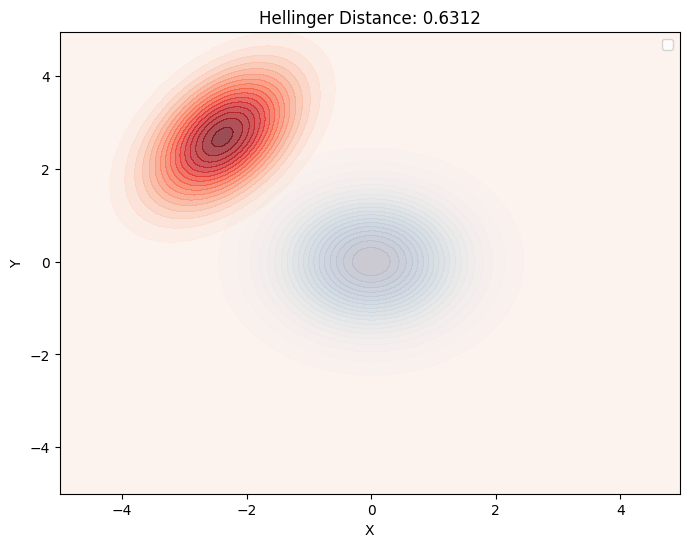

Closest distance to 0.7000000000000001: 0.2404 (achieved distance: 0.4596)


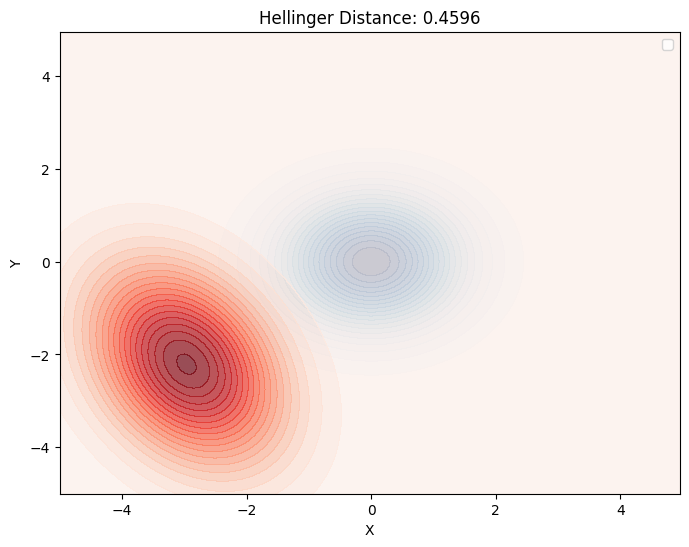

Closest distance to 0.8: 0.3375 (achieved distance: 0.4625)


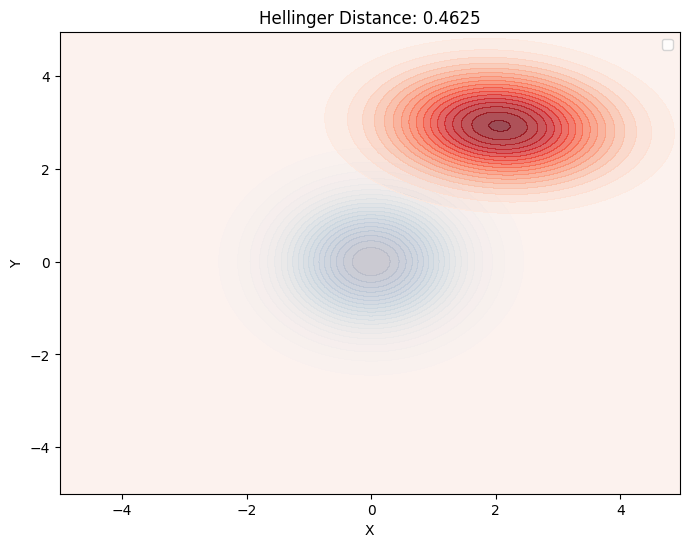

Closest distance to 0.9: 0.2796 (achieved distance: 0.6204)


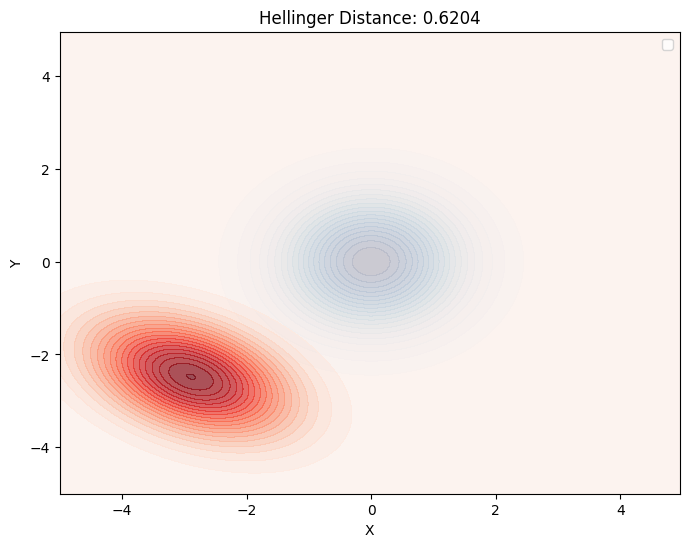

Closest distance to 1.0: 0.4402 (achieved distance: 0.5598)


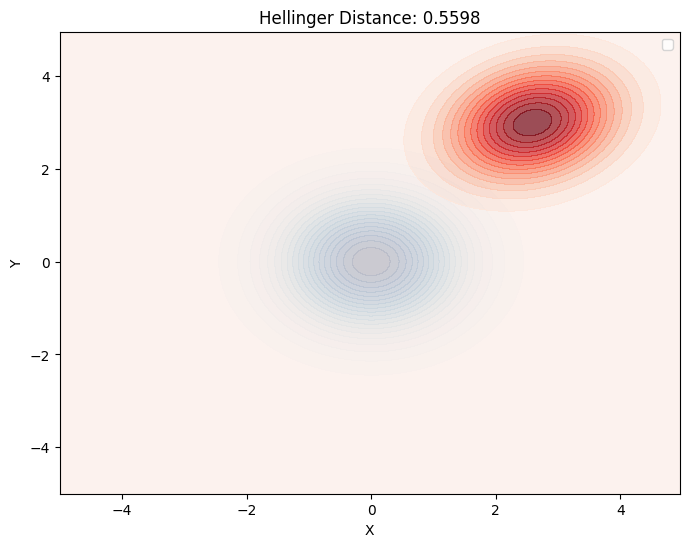

In [32]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution

# Target distances (for demonstration)
target_distances = np.arange(0, 1.1, 0.1).tolist()  # Example: <0.5, ~0.5, >0.5

experiment(
    hellinger_distance,
    mean1=mean1,
    cov1=cov1,
    target_distances=target_distances,
    title="Hellinger Distance",
)


# MMD


Closest distance to 0.0: 1.4413 (achieved distance: 1.4413)


C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:70: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


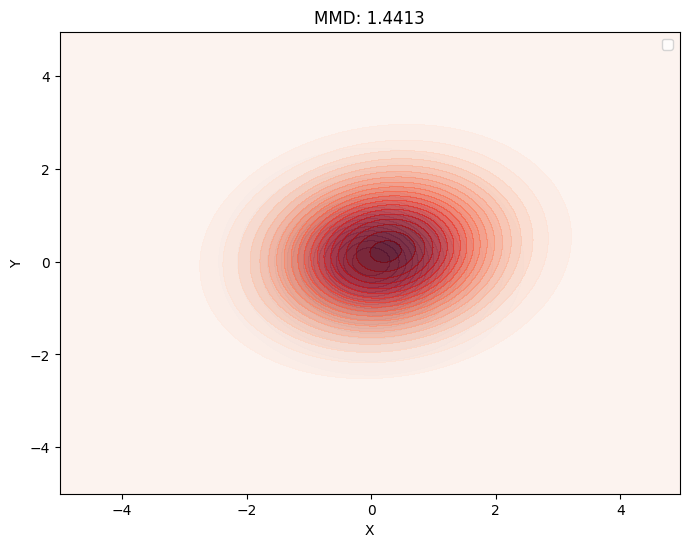

Closest distance to 0.2: 1.2350 (achieved distance: 1.4350)


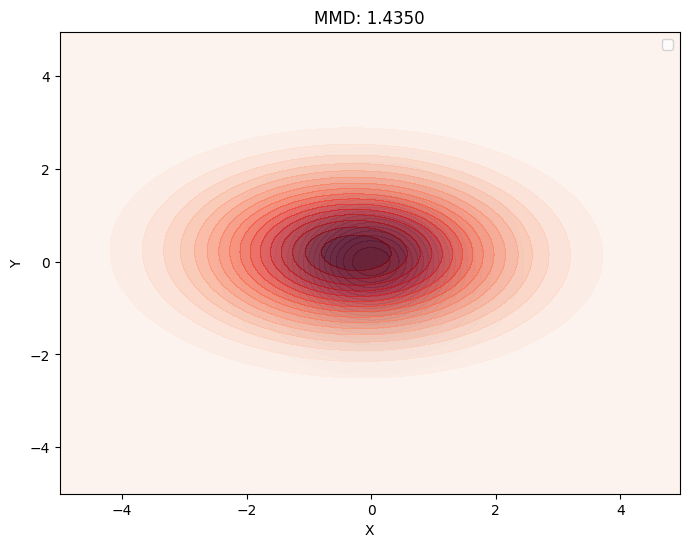

Closest distance to 0.4: 1.0207 (achieved distance: 1.4207)


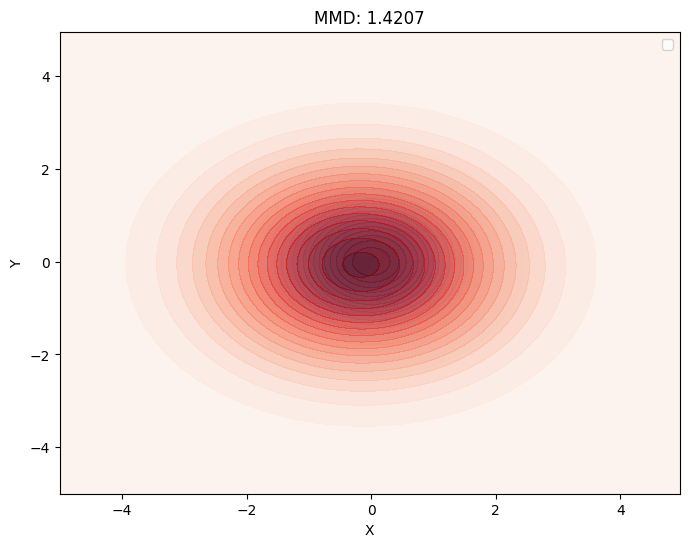

Closest distance to 0.6000000000000001: 0.8322 (achieved distance: 1.4322)


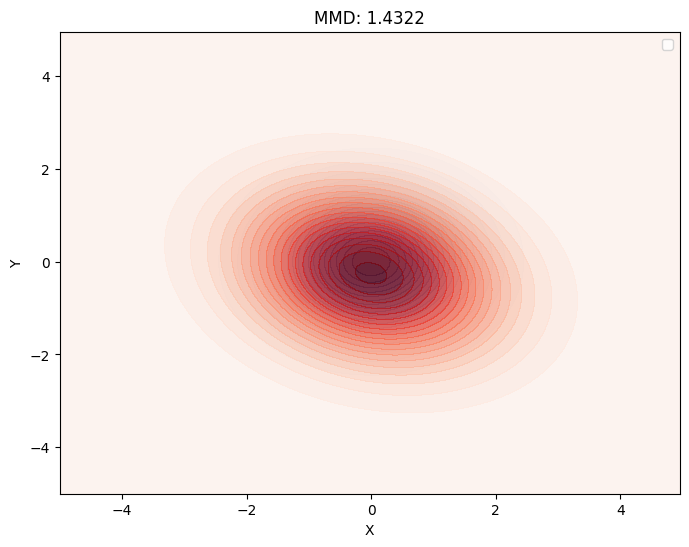

Closest distance to 0.8: 0.6569 (achieved distance: 1.4569)


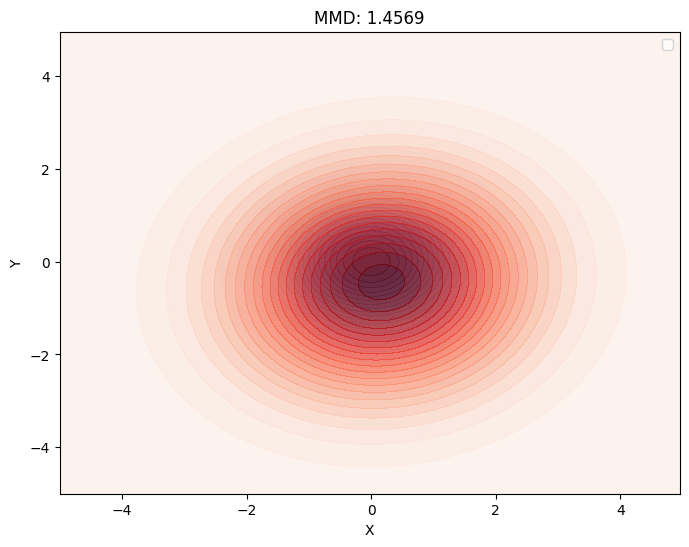

Closest distance to 1.0: 0.4488 (achieved distance: 1.4488)


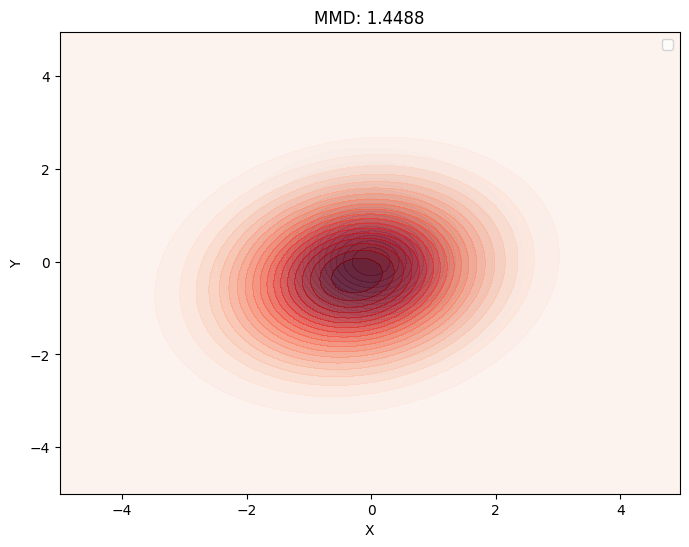

Closest distance to 1.2000000000000002: 0.2376 (achieved distance: 1.4376)


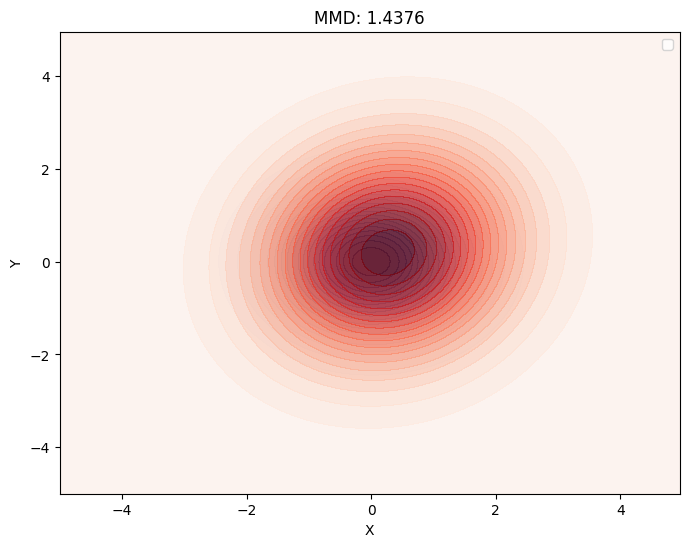

Closest distance to 1.4000000000000001: 0.0222 (achieved distance: 1.4222)


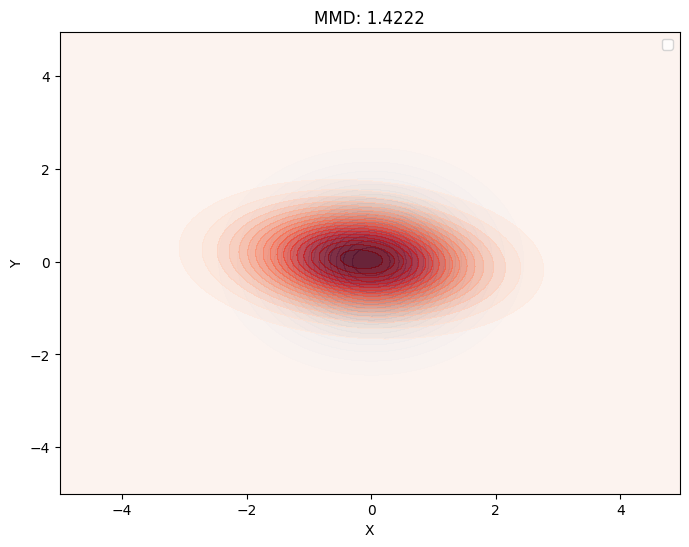

Closest distance to 1.6: 0.0040 (achieved distance: 1.6040)


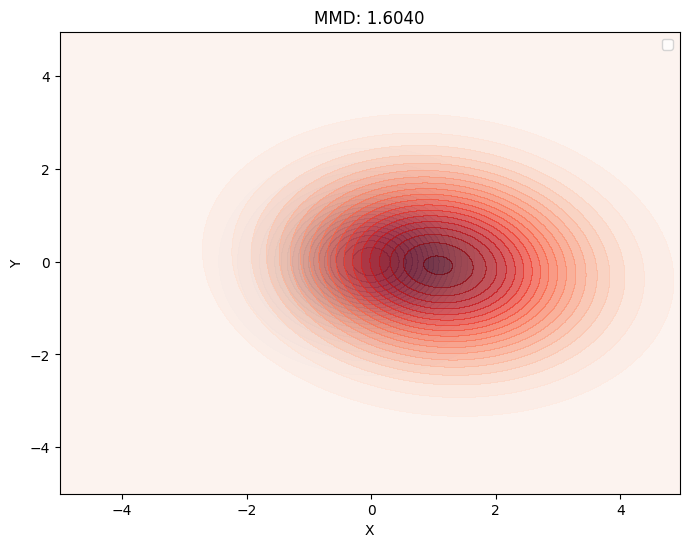

Closest distance to 1.8: 0.0002 (achieved distance: 1.7998)


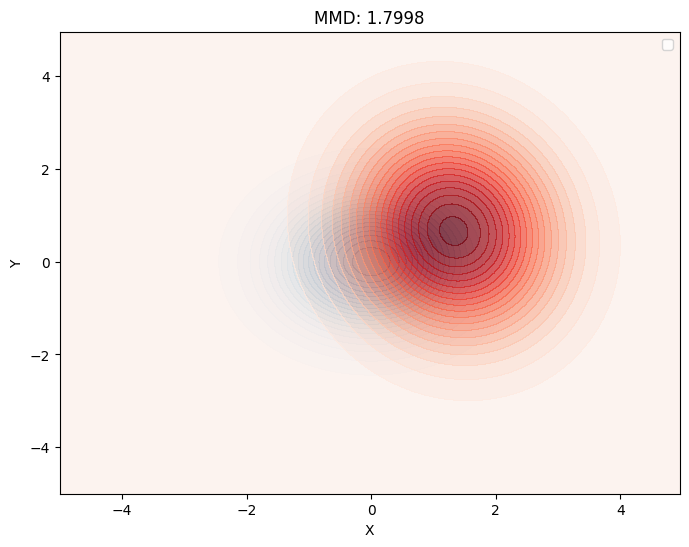

Closest distance to 2.0: 0.0006 (achieved distance: 1.9994)


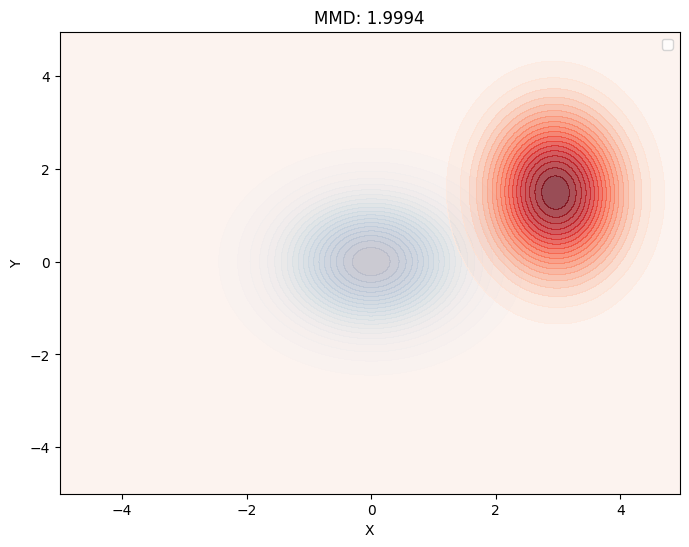

In [33]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution

# Target distances (for demonstration)
target_distances = np.arange(0, 2.2, 0.2).tolist()  # Example: <0.5, ~0.5, >0.5

experiment(mmd, mean1=mean1, cov1=cov1, target_distances=target_distances, title="MMD")

# Wasserstein distance


Closest distance to 0.0: 0.5105 (achieved distance: 0.5105)


C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:70: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


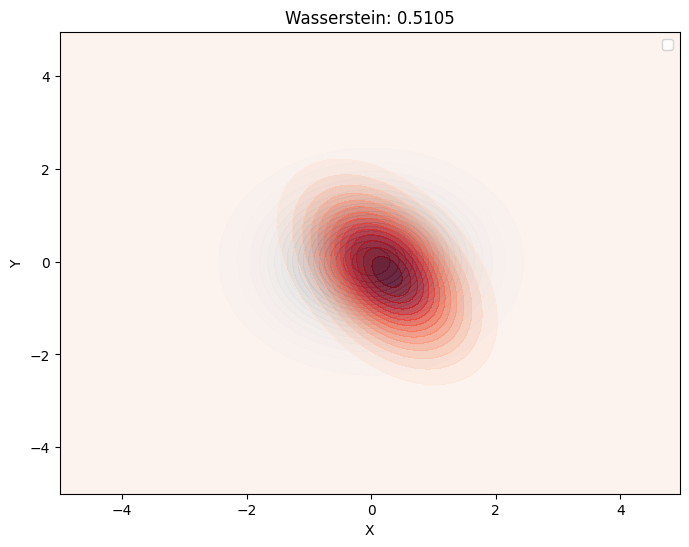

Closest distance to 0.4: 0.3189 (achieved distance: 0.7189)


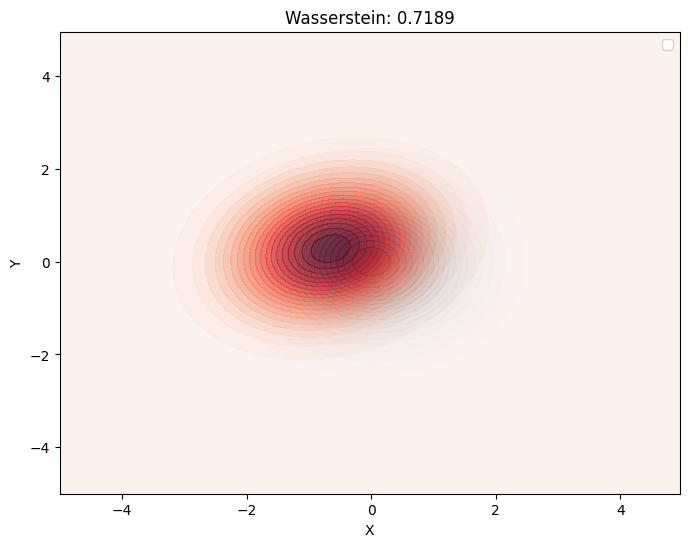

Closest distance to 0.8: 0.0043 (achieved distance: 0.8043)


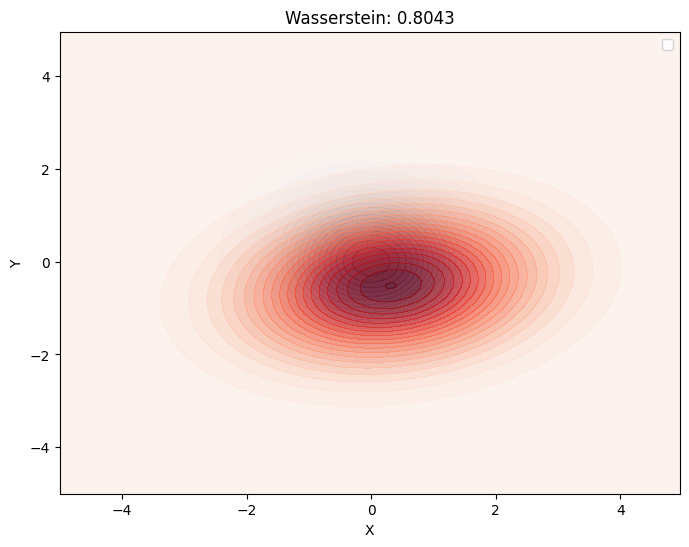

Closest distance to 1.2000000000000002: 0.0221 (achieved distance: 1.1779)


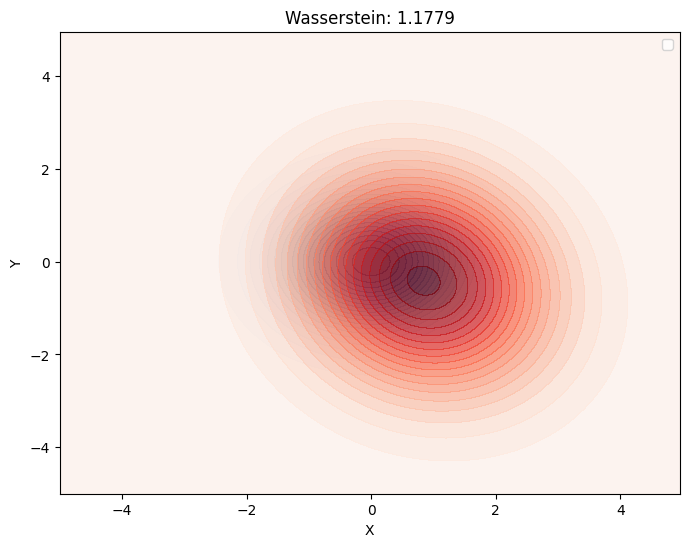

Closest distance to 1.6: 0.0123 (achieved distance: 1.5877)


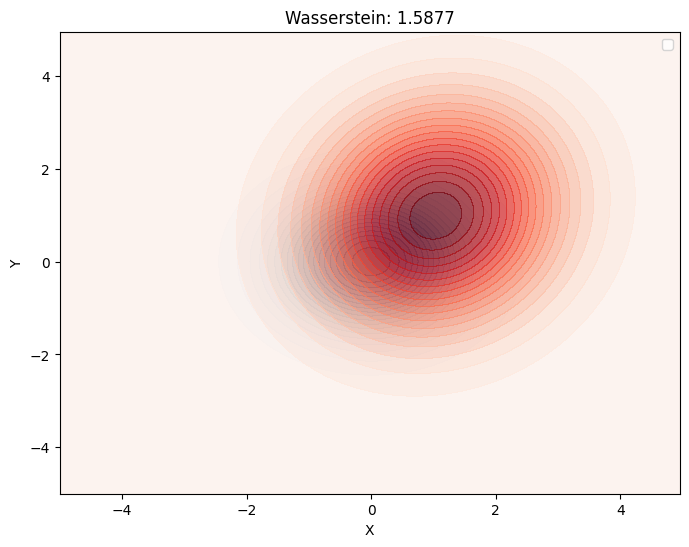

Closest distance to 2.0: 0.0309 (achieved distance: 1.9691)


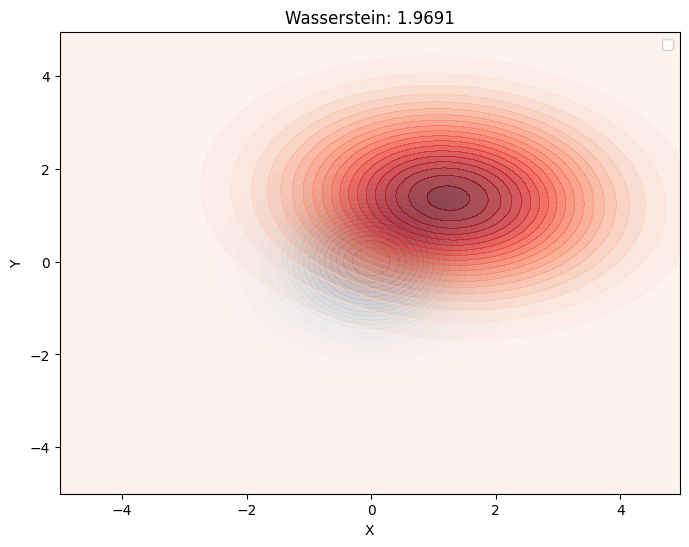

Closest distance to 2.4000000000000004: 0.0016 (achieved distance: 2.3984)


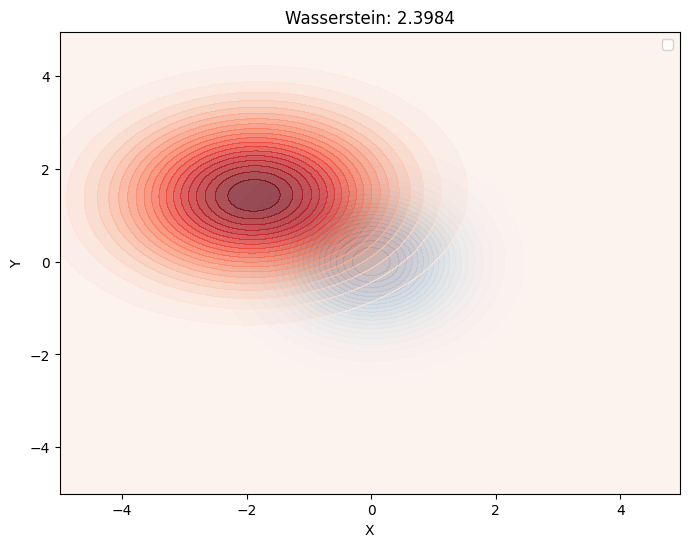

Closest distance to 2.8000000000000003: 0.0292 (achieved distance: 2.8292)


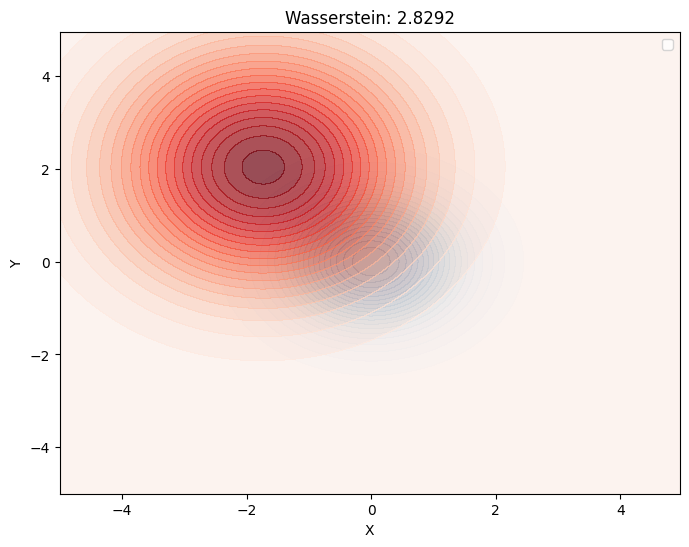

Closest distance to 3.2: 0.0708 (achieved distance: 3.2708)


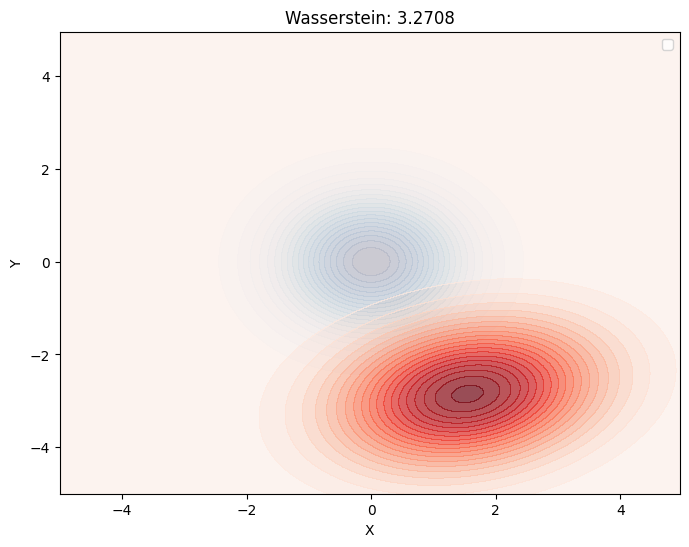

Closest distance to 3.6: 0.0043 (achieved distance: 3.5957)


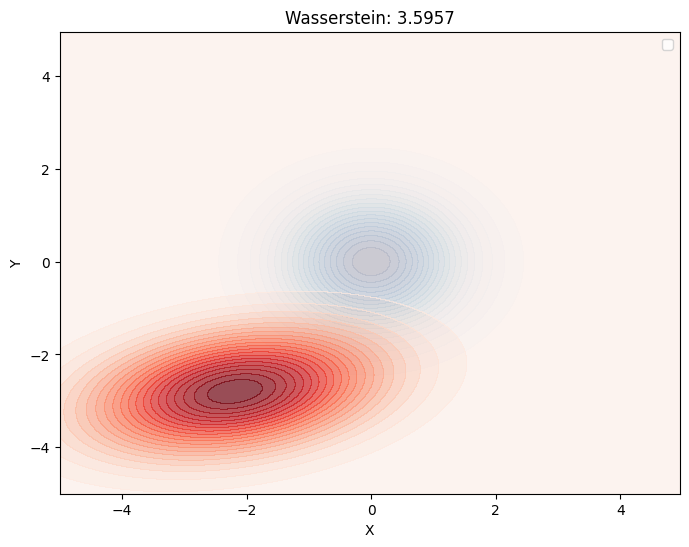

Closest distance to 4.0: 0.0106 (achieved distance: 3.9894)


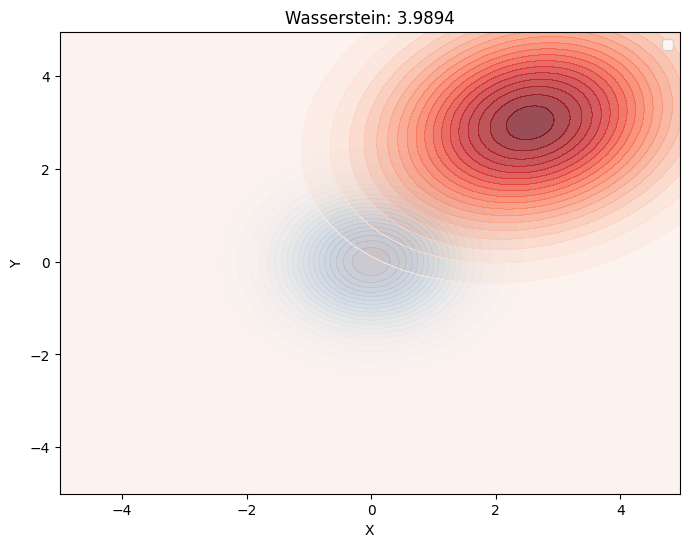

In [34]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution

# Target distances (for demonstration)
target_distances = np.arange(0, 4.4, 0.4).tolist()  # Example: <0.5, ~0.5, >0.5

experiment(
    wasserstein_distance,
    mean1=mean1,
    cov1=cov1,
    target_distances=target_distances,
    title="Wasserstein",
)

#custom distance


Closest distance to 0.0: 0.0531 (achieved distance: 0.0531)


C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:70: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(
C:\Users\manse\AppData\Local\Temp\ipykernel_3088\1036459472.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


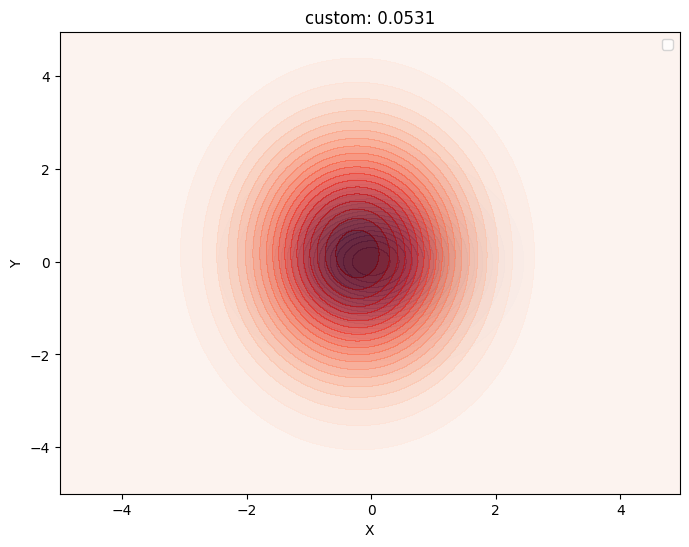

Closest distance to 0.1: 0.0002 (achieved distance: 0.1002)


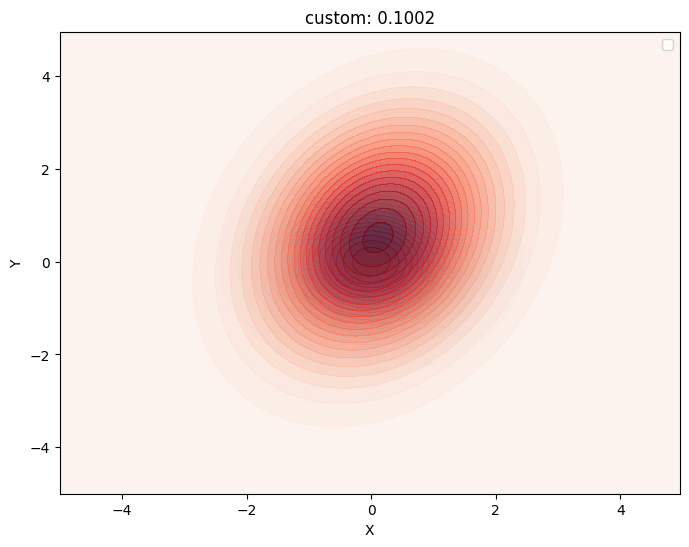

Closest distance to 0.2: 0.0085 (achieved distance: 0.2085)


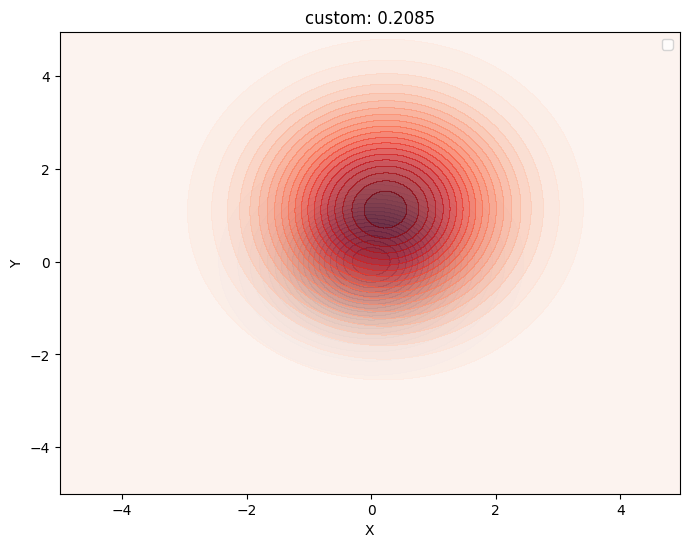

Closest distance to 0.30000000000000004: 0.0023 (achieved distance: 0.3023)


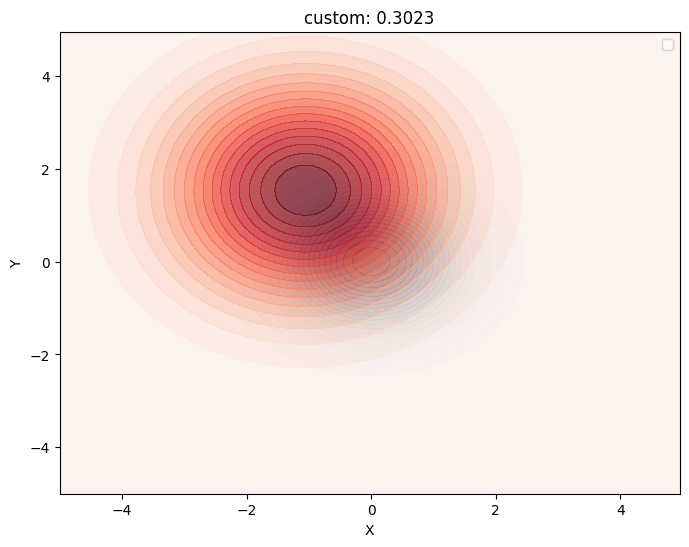

Closest distance to 0.4: 0.0025 (achieved distance: 0.3975)


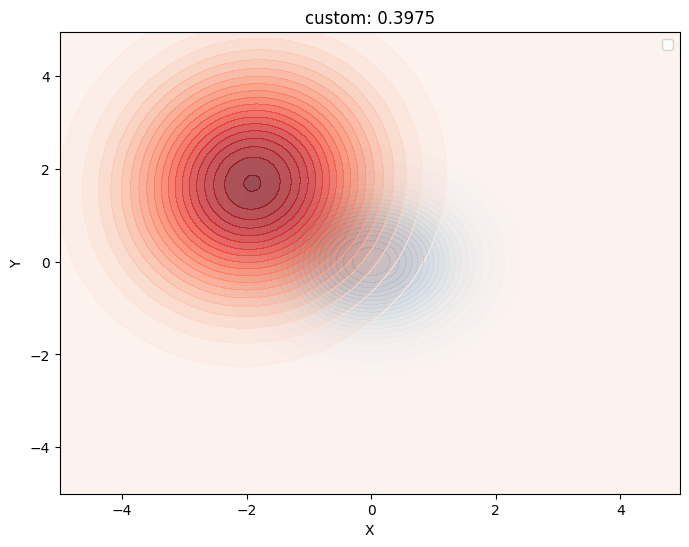

Closest distance to 0.5: 0.0040 (achieved distance: 0.5040)


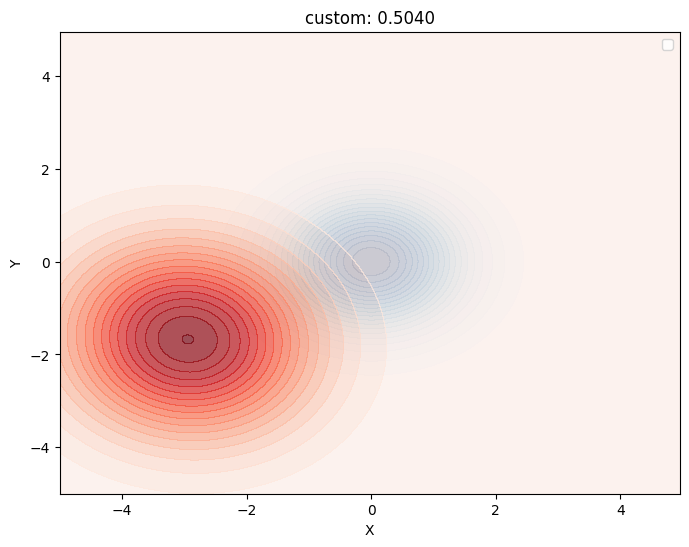

Closest distance to 0.6000000000000001: 0.0104 (achieved distance: 0.5896)


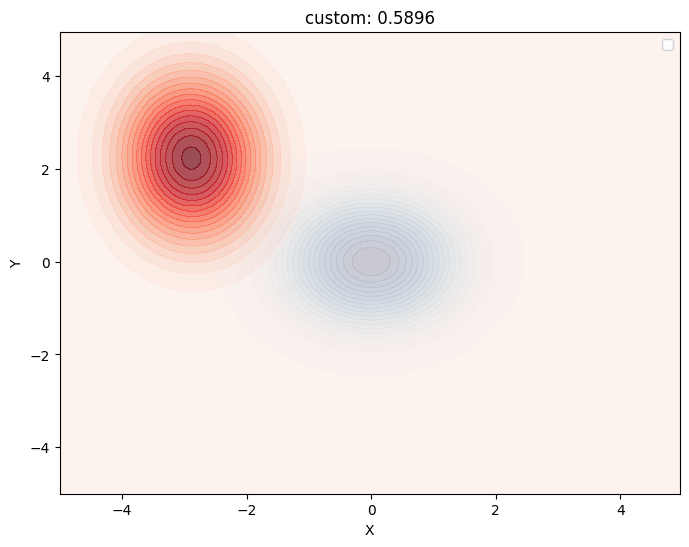

Closest distance to 0.7000000000000001: 0.1303 (achieved distance: 0.5697)


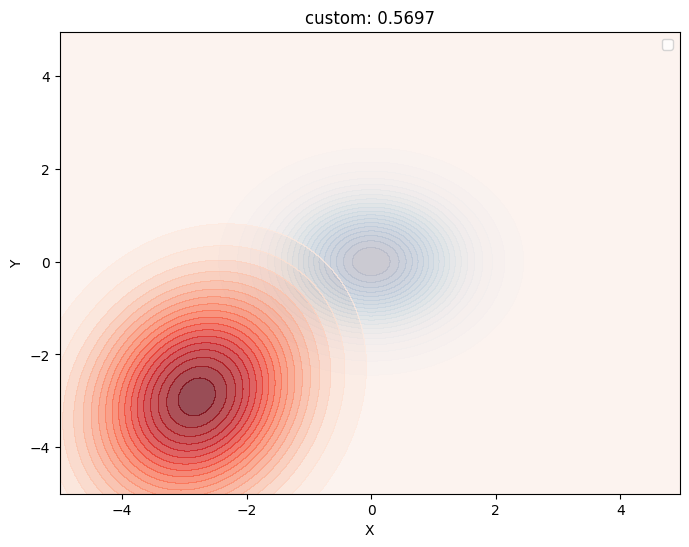

Closest distance to 0.8: 0.1974 (achieved distance: 0.6026)


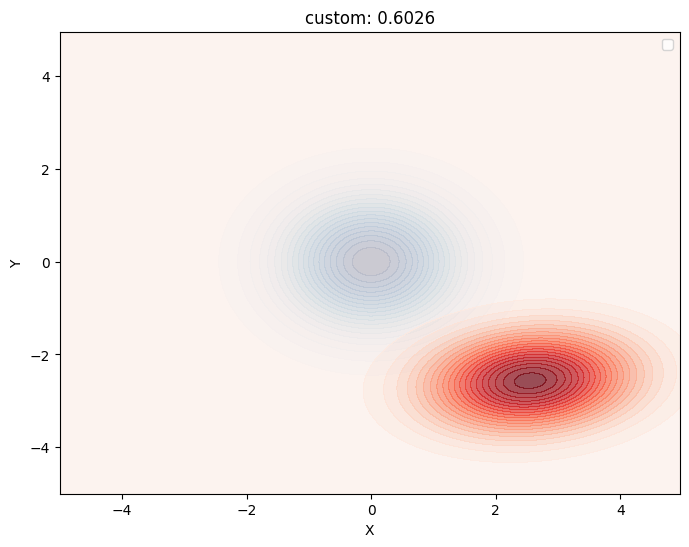

Closest distance to 0.9: 0.2846 (achieved distance: 0.6154)


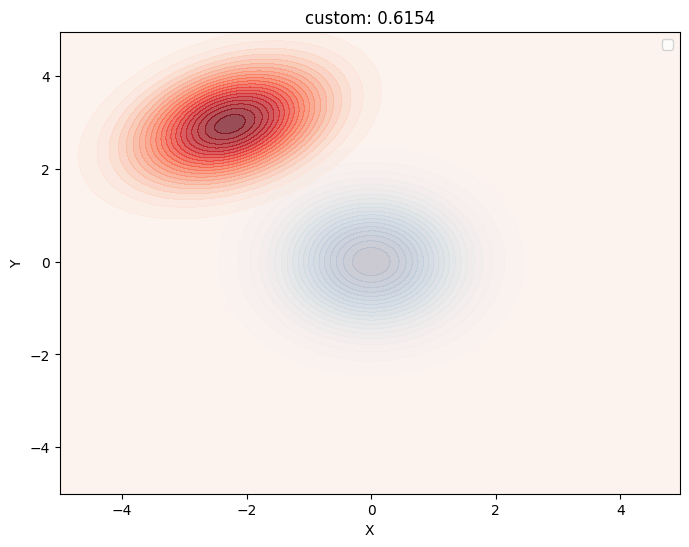

Closest distance to 1.0: 0.3851 (achieved distance: 0.6149)


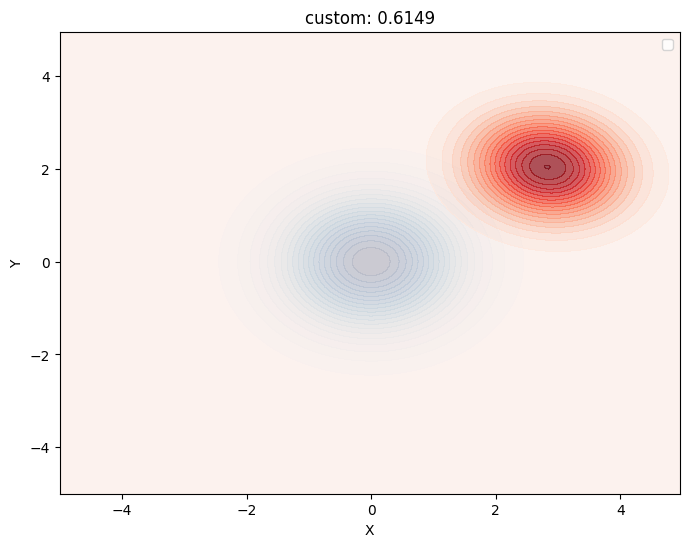

In [35]:
# Define mean1 and cov1 (you can adjust these values as needed)
mean1 = np.array([0, 0])  # Mean of the first distribution
cov1 = np.array([[1, 0], [0, 1]])  # Covariance matrix of the first distribution

# Target distances (for demonstration)
target_distances = np.arange(0, 1.1, 0.1).tolist()  # Example: <0.5, ~0.5, >0.5

experiment(
    custom_distance,
    mean1=mean1,
    cov1=cov1,
    target_distances=target_distances,
    title="custom",
)

# Confidence intervals

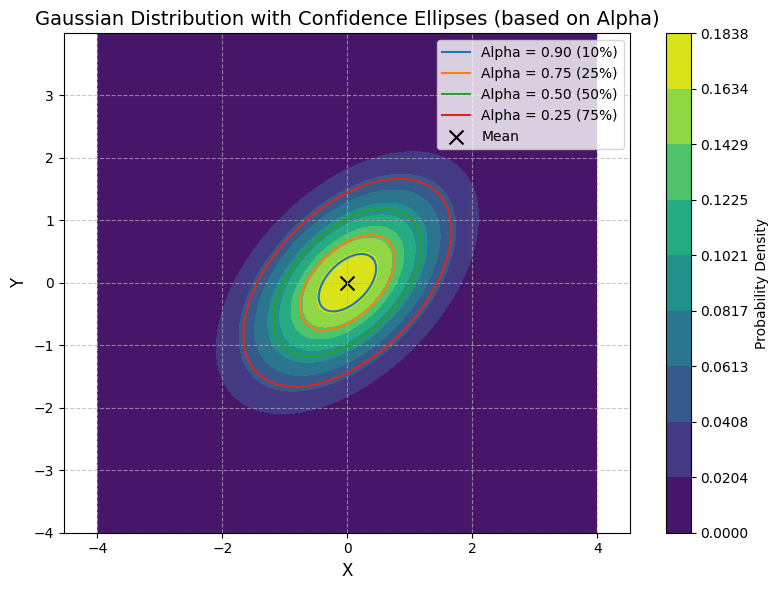

In [36]:
from scipy.stats import chi2

def confidence_ellipse(mean, cov, alpha):
    """Generates points for a confidence ellipse based on alpha."""
    df = 2
    chi2_val = chi2.ppf(1 - alpha, df)

    eigenvals, eigenvecs = np.linalg.eig(cov)
    axes = np.sqrt(eigenvals) * np.sqrt(chi2_val)

    theta = np.linspace(0, 2 * np.pi, 100)
    ellipse_points = np.array([np.cos(theta) * axes[0], np.sin(theta) * axes[1]])
    rotated_ellipse = np.dot(eigenvecs, ellipse_points) + mean.reshape(2, 1)
    x, y = rotated_ellipse[0], rotated_ellipse[1]
    return x, y

# Example usage:
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])

# Define alpha values (significance levels)
alphas = [0.90, 0.75, 0.50, 0.25]

plt.figure(figsize=(8, 6))

# Gaussian PDF calculation and contour plotting (only once)
x_grid, y_grid = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.dstack((x_grid, y_grid))
rv = multivariate_normal(mean, cov)
pdf_values = rv.pdf(pos)

num_levels = 10
levels = np.linspace(pdf_values.min(), pdf_values.max(), num_levels)

plt.contourf(x_grid, y_grid, pdf_values, cmap='viridis', levels=levels)
plt.colorbar(label='Probability Density')

for alpha in alphas:
    x, y = confidence_ellipse(mean, cov, alpha)
    plt.plot(x, y, label=f'Alpha = {alpha:.2f} ({(1-alpha)*100:.0f}%)')  # Label with alpha and confidence

plt.scatter(mean[0], mean[1], c='black', marker='x', s=100, label='Mean')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Gaussian Distribution with Confidence Ellipses (based on Alpha)', fontsize=14)
plt.legend(fontsize=10)
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()